# MOwNiT
## Laboratorium 3 - Język R

## Zadanie

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)  **(1p.)**
2. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) **(1p.)**
3. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników (słupki błędów)  **(1p.)**

In [1]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
df <- read_csv("readings.csv")
df

Rows: 200 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): calc_type
dbl (2): size, time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


calc_type,size,time
<chr>,<dbl>,<dbl>
dot,1000,0.000000638
product,1000,0.000511019
dot,1000,0.000000597
product,1000,0.000471231
dot,1000,0.000000639
product,1000,0.000434099
dot,1000,0.000000531
product,1000,0.000411303
dot,1000,0.000000559


In [3]:
results <- df %>% 
    group_by(calc_type, size) %>%
    summarise(std=sd(time), mean=mean(time), .groups='drop')  %>% 
    arrange(calc_type)

results

calc_type,size,std,mean
<chr>,<dbl>,<dbl>,<dbl>
dot,1000,4.062074e-08,0.0000005844
dot,2000,4.448885e-07,0.0000012548
dot,3000,2.876715e-07,0.0000016060
dot,4000,7.768204e-08,0.0000019855
dot,5000,2.141344e-07,0.0000025240
dot,6000,4.229681e-07,0.0000031344
dot,7000,1.563006e-07,0.0000032969
dot,8000,1.703018e-07,0.0000038274
dot,9000,1.937568e-06,0.0000051826


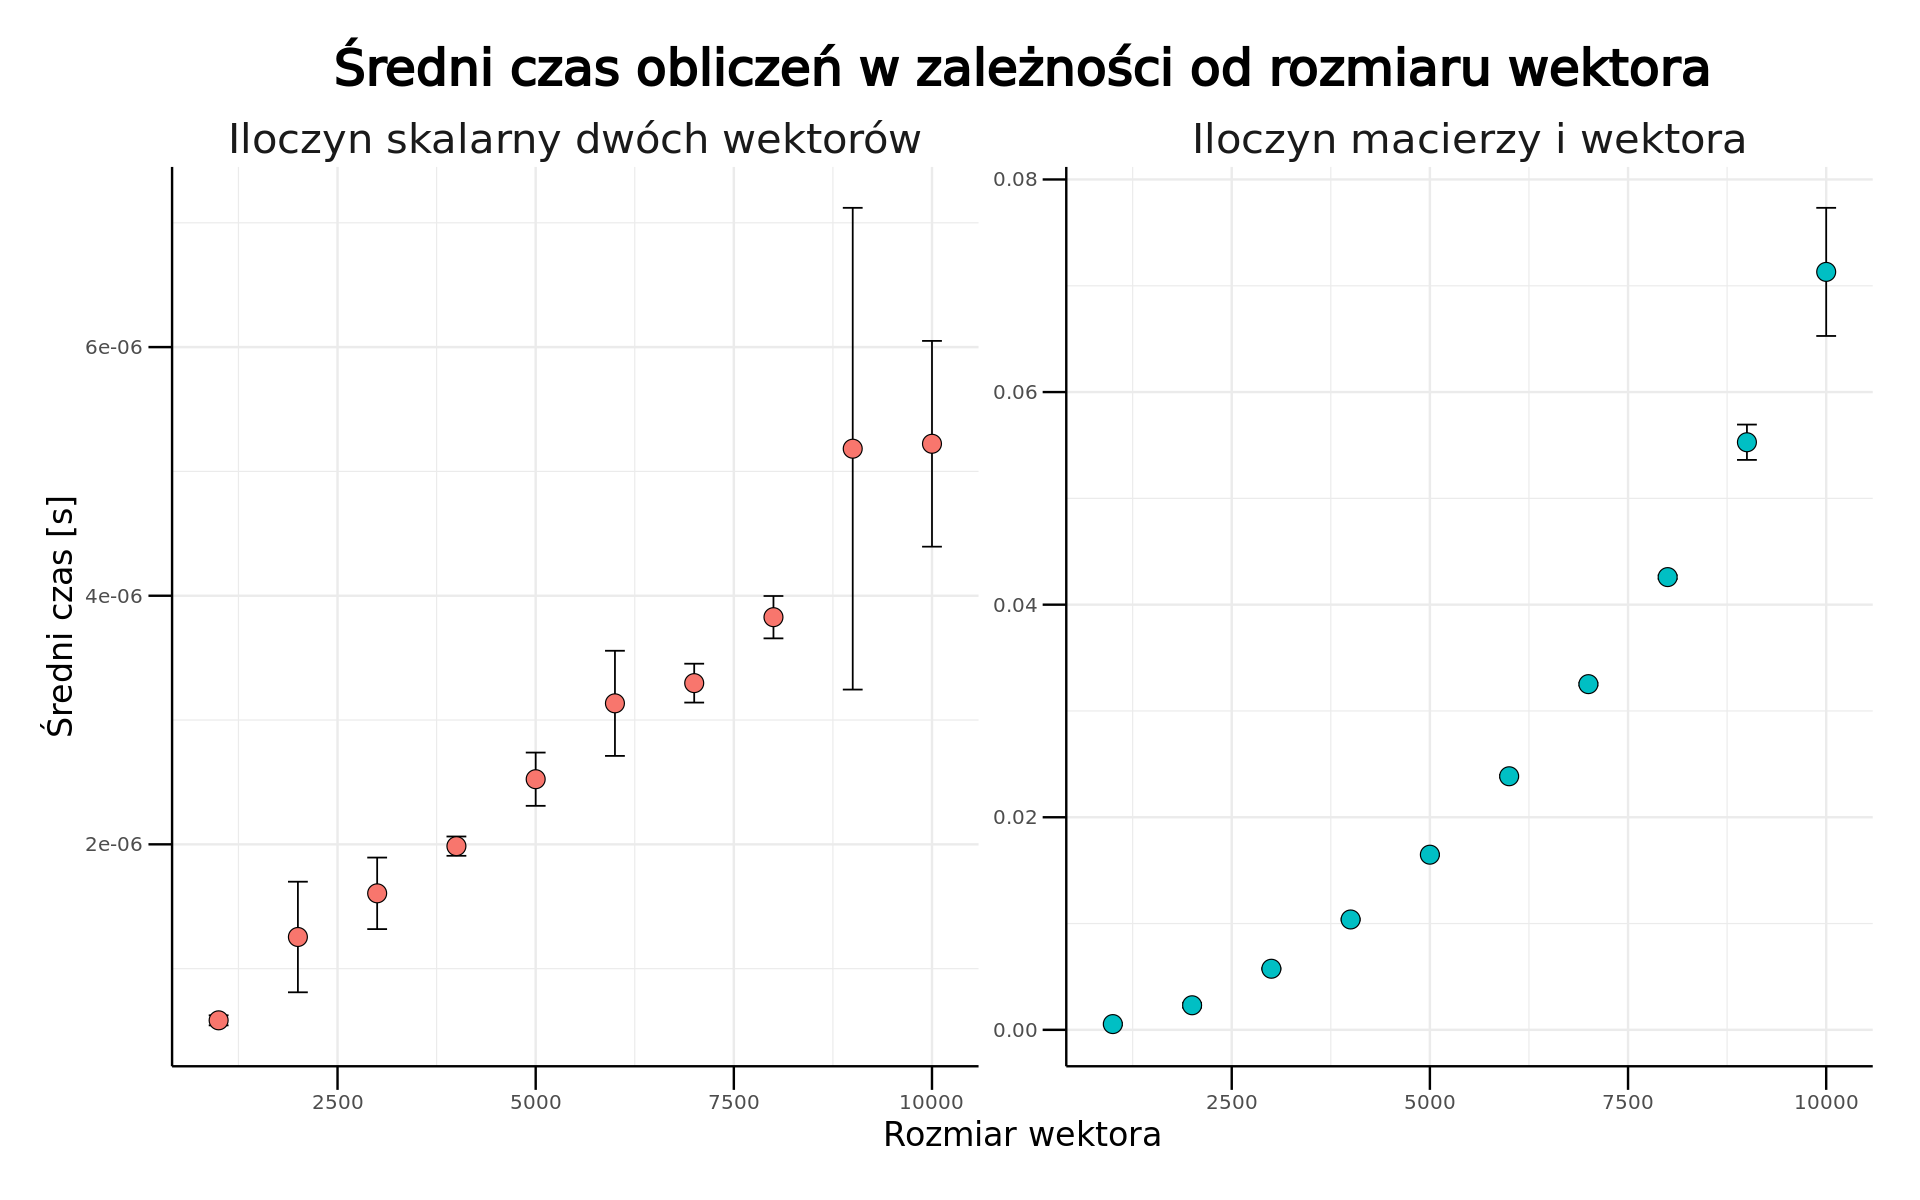

In [4]:
options(repr.plot.width=16, repr.plot.height=10)

titles <- setNames(
    c("Iloczyn skalarny dwóch wektorów", "Iloczyn macierzy i wektora"), 
    c("dot", "product")
) 

ggplot(
    results, 
    aes(x=size, y=mean)
) +
geom_errorbar(
    aes(ymin = mean - std, ymax = mean + std),  
    width=250, 
    color="black"
) +
geom_point(
    aes(fill=calc_type), 
    colour="black",
    pch=21, 
    size=5
) +
facet_wrap(
    ~calc_type, 
    nrow=1, 
    scales="free", 
    labeller=as_labeller(titles)
) +
labs(
    x="Rozmiar wektora", 
    y="Średni czas [s]", 
    title="Średni czas obliczeń w zależności od rozmiaru wektora"
) +
theme_minimal(
    base_size=15,
) +
theme(
    legend.position="none", 
    plot.title=element_text(size=30, face="bold", hjust=0.5), 
    axis.title=element_text(size=20), 
    strip.text.x=element_text(size=25),
    axis.line=element_line(colour="black"),
    axis.ticks=element_line(colour="black"),
    axis.ticks.length = unit(.5, "cm"),
    plot.margin=margin(1,1,1,1,"cm")
)